In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Importing Data

In [2]:
hr_train=pd.read_csv('train_LZdllcl.csv')

In [3]:
hr_train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [4]:
hr_train.info()   # getting insight of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [5]:
hr_train.isnull().sum() # checking null values per column

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

#### Taking each variable one by one 

In [6]:
hr_train.dtypes #checking the data type of each column 

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [7]:
hr_train['department'].unique() #unique objects in a column

array(['Sales & Marketing', 'Operations', 'Technology', 'Analytics',
       'R&D', 'Procurement', 'Finance', 'HR', 'Legal'], dtype=object)

In [8]:
hr_train['department'].value_counts() #count of each department

Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64

In [10]:
hr_train['region'].unique()

array(['region_7', 'region_22', 'region_19', 'region_23', 'region_26',
       'region_2', 'region_20', 'region_34', 'region_1', 'region_4',
       'region_29', 'region_31', 'region_15', 'region_14', 'region_11',
       'region_5', 'region_28', 'region_17', 'region_13', 'region_16',
       'region_25', 'region_10', 'region_27', 'region_30', 'region_12',
       'region_21', 'region_8', 'region_32', 'region_6', 'region_33',
       'region_24', 'region_3', 'region_9', 'region_18'], dtype=object)

In [9]:
hr_train['region'].value_counts()

region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34      292
region_33      269
region_18       31
Name: region, dtype: int64

In [11]:
hr_train['education'].unique()

array(["Master's & above", "Bachelor's", nan, 'Below Secondary'],
      dtype=object)

In [12]:
hr_train['education'].value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [13]:
hr_train['gender'].unique()

array(['f', 'm'], dtype=object)

## cheking the relation between award won candidate and promoted candidate

<AxesSubplot:xlabel='is_promoted', ylabel='count'>

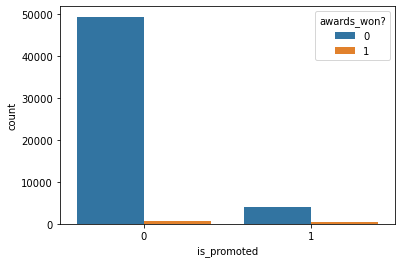

In [14]:
sns.countplot(x='is_promoted',hue='awards_won?',data=hr_train)

<AxesSubplot:xlabel='education', ylabel='count'>

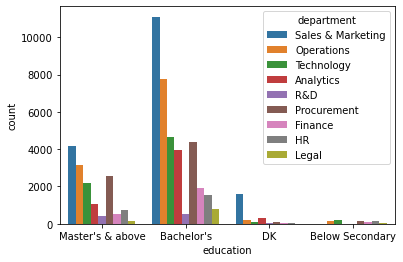

In [15]:
# replacing the nan value to DK("don't know") in the education variable
hr_train['education'].replace(np.nan,'DK',inplace=True)

sns.countplot(x='education',hue='department',data=hr_train)

In [16]:
#cheking the only where education is dk
hr_train.loc[hr_train['education']=='DK']

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
10,29934,Technology,region_23,DK,m,sourcing,1,30,NaN,1,0,0,77,0
21,33332,Operations,region_15,DK,m,sourcing,1,41,4.0,11,0,0,57,0
32,35465,Sales & Marketing,region_7,DK,f,sourcing,1,24,1.0,2,0,0,48,0
43,17423,Sales & Marketing,region_2,DK,m,other,3,24,2.0,2,0,0,48,0
82,66013,Sales & Marketing,region_2,DK,m,sourcing,2,25,3.0,2,0,0,53,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54692,14821,Sales & Marketing,region_2,DK,f,sourcing,1,35,3.0,7,0,0,53,0
54717,7684,Analytics,region_2,DK,m,sourcing,1,32,3.0,4,0,0,86,0
54729,1797,HR,region_2,DK,f,other,1,28,3.0,2,0,0,53,0
54742,38935,Sales & Marketing,region_31,DK,m,other,1,28,4.0,3,0,0,47,0


In [17]:
hr_train.groupby('recruitment_channel').get_group('sourcing')

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
5,58896,Analytics,region_2,Bachelor's,m,sourcing,2,31,3.0,7,0,0,85,0
7,16290,Operations,region_34,Master's & above,m,sourcing,1,33,3.0,6,0,0,63,0
9,28911,Sales & Marketing,region_1,Master's & above,m,sourcing,1,32,5.0,5,1,0,54,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54791,27274,Technology,region_11,Bachelor's,m,sourcing,1,32,1.0,3,1,0,82,0
54797,62450,Sales & Marketing,region_11,Bachelor's,m,sourcing,1,28,5.0,3,1,1,47,0
54801,12431,Technology,region_26,Bachelor's,f,sourcing,1,31,NaN,1,0,0,78,0
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0


## we can assume that missing values in Education is because people are not Educated it might be possible that they are office staff

In [18]:
# after knowing we an change dk to Uneducated
hr_train['education'].replace('DK','Uneducated',inplace=True)

In [19]:
hr_train.isnull().sum()

employee_id                0
department                 0
region                     0
education                  0
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [21]:
# checking the location of values where previous year rating is nan
hr_train.loc[hr_train['previous_year_rating'].isnull()]

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
10,29934,Technology,region_23,Uneducated,m,sourcing,1,30,NaN,1,0,0,77,0
23,71177,Procurement,region_5,Bachelor's,m,other,1,27,NaN,1,0,0,70,0
29,74759,Sales & Marketing,region_4,Bachelor's,m,sourcing,1,26,NaN,1,0,0,44,0
56,45709,Sales & Marketing,region_31,Bachelor's,f,other,1,29,NaN,1,0,0,49,0
58,26599,Sales & Marketing,region_16,Bachelor's,m,other,2,27,NaN,1,1,0,47,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54703,74615,R&D,region_31,Bachelor's,m,sourcing,1,30,NaN,1,1,0,88,0
54734,11685,Operations,region_15,Bachelor's,m,sourcing,1,31,NaN,1,1,0,56,1
54746,10546,Finance,region_6,Bachelor's,m,other,1,28,NaN,1,1,0,61,0
54773,37919,Finance,region_2,Bachelor's,m,other,1,23,NaN,1,1,0,61,0


In [22]:
#we can nan to DK(don't know) just for our simplicity
hr_train['previous_year_rating'].replace(np.nan,'Dk',inplace=True)

<AxesSubplot:xlabel='KPIs_met >80%', ylabel='count'>

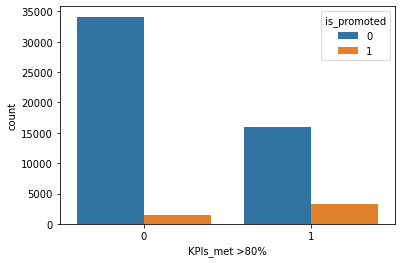

In [23]:
sns.countplot(x='KPIs_met >80%',hue='is_promoted',data=hr_train)

<AxesSubplot:xlabel='previous_year_rating', ylabel='count'>

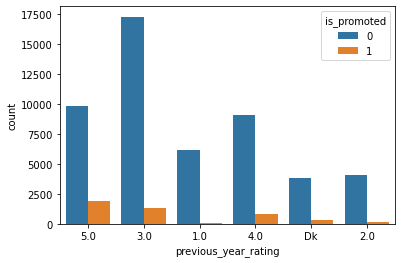

In [24]:
sns.countplot(x='previous_year_rating',hue='is_promoted',data=hr_train)

as we can see that not promoted of 'DK' and 2.0 is almost similar and from the above we can see that recruitment_channel is sourcing and other and length_of_service is 1

<AxesSubplot:xlabel='KPIs_met >80%', ylabel='count'>

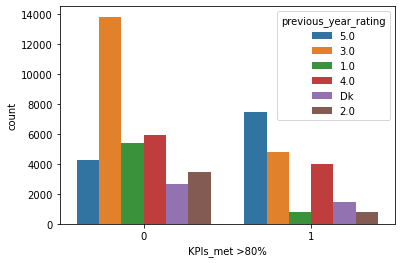

In [25]:
sns.countplot(x='KPIs_met >80%',hue='previous_year_rating',data=hr_train)

In [26]:
hr_train['previous_year_rating'].value_counts()

3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Dk      4124
Name: previous_year_rating, dtype: int64

In [27]:
hr_train.groupby('previous_year_rating').length_of_service.value_counts()

previous_year_rating  length_of_service
1.0                   4                     864
                      3                     852
                      2                     841
                      5                     716
                      7                     659
                                           ... 
5.0                   32                      3
                      30                      2
                      34                      2
                      37                      1
Dk                    1                    4124
Name: length_of_service, Length: 164, dtype: int64

In [28]:
#previous year rating in % 
(hr_train['previous_year_rating'].value_counts()/len(hr_train)*100)

3.0    33.969494
5.0    21.422055
4.0    18.021092
1.0    11.354182
2.0     7.708729
Dk      7.524449
Name: previous_year_rating, dtype: float64

as we can see 7% is don't know category

<AxesSubplot:>

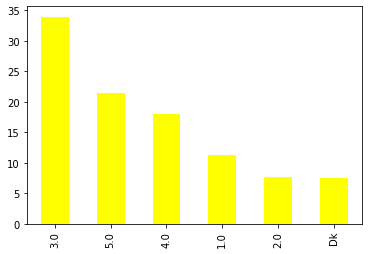

In [29]:
(hr_train['previous_year_rating'].value_counts()/len(hr_train)*100).plot(kind='bar',color='yellow')

### we can see that all nan values have lenght of service 1 its means there is no previous_rating

In [30]:
# so we can say that they are freshers or they don't have previous year rating .
# we can change dk to 0
hr_train['previous_year_rating'].replace('Dk',0.0,inplace=True)

hr_train['previous_year_rating'].value_counts()

3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
0.0     4124
Name: previous_year_rating, dtype: int64

<AxesSubplot:>

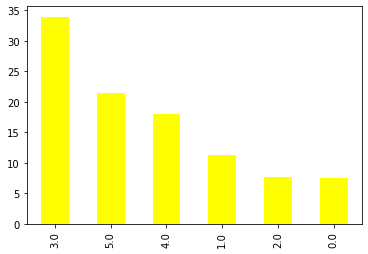

In [31]:
(hr_train['previous_year_rating'].value_counts()/len(hr_train)*100).plot(kind='bar',color='yellow')

In [32]:
hr_train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [33]:
hr_train.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

now we can say that data is clean and null values are removed

In [34]:
#now its time to deal with value missmatch
hr_train.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [35]:
hr_train['KPIs_met >80%']=hr_train['KPIs_met >80%'].astype(str)
hr_train['awards_won?']=hr_train['awards_won?'].astype(str)
hr_train['previous_year_rating']=hr_train['previous_year_rating'].astype(str)
hr_train.dtypes

employee_id              int64
department              object
region                  object
education               object
gender                  object
recruitment_channel     object
no_of_trainings          int64
age                      int64
previous_year_rating    object
length_of_service        int64
KPIs_met >80%           object
awards_won?             object
avg_training_score       int64
is_promoted              int64
dtype: object

i changed the column data type because they are appear as numeric but they are used as categorical

### Now our data is ready for Machine learning Model Building 

In [36]:
hr_train.corr() # checking the corelation of each column with each other

,employee_id,no_of_trainings,age,length_of_service,avg_training_score,is_promoted
employee_id,1.000000,-0.005121,0.000437,0.001274,-0.000586,0.001206
no_of_trainings,-0.005121,1.000000,-0.081278,-0.057275,0.042517,-0.024896
age,0.000437,-0.081278,1.000000,0.657111,-0.048380,-0.017166
length_of_service,0.001274,-0.057275,0.657111,1.000000,-0.038122,-0.010670
avg_training_score,-0.000586,0.042517,-0.048380,-0.038122,1.000000,0.181147
is_promoted,0.001206,-0.024896,-0.017166,-0.010670,0.181147,1.000000


In [37]:
pd.get_dummies(hr_train).corr() #in this step all the categorical variables are also present

,employee_id,no_of_trainings,age,length_of_service,avg_training_score,is_promoted,department_Analytics,department_Finance,department_HR,department_Legal,...,previous_year_rating_0.0,previous_year_rating_1.0,previous_year_rating_2.0,previous_year_rating_3.0,previous_year_rating_4.0,previous_year_rating_5.0,KPIs_met >80%_0,KPIs_met >80%_1,awards_won?_0,awards_won?_1
employee_id,1.000000,-0.005121,0.000437,0.001274,-0.000586,0.001206,-0.001291,0.007139,0.007994,-0.006410,...,0.002018,-0.006483,-0.002595,0.003085,0.003132,-0.001092,0.002501,-0.002501,-0.008420,0.008420
no_of_trainings,-0.005121,1.000000,-0.081278,-0.057275,0.042517,-0.024896,0.045791,0.018442,-0.070258,-0.037305,...,0.026745,0.031388,-0.010550,0.045050,-0.034826,-0.053984,0.045576,-0.045576,0.007628,-0.007628
age,0.000437,-0.081278,1.000000,0.657111,-0.048380,-0.017166,-0.101895,-0.078936,-0.011725,-0.017628,...,-0.295318,0.024823,0.014292,0.072908,0.029236,0.049836,0.025592,-0.025592,0.008169,-0.008169
length_of_service,0.001274,-0.057275,0.657111,1.000000,-0.038122,-0.010670,-0.071945,-0.054025,-0.009162,-0.041259,...,-0.325408,0.030055,0.025504,0.074636,0.036109,0.049413,0.077693,-0.077693,0.039927,-0.039927
avg_training_score,-0.000586,0.042517,-0.048380,-0.038122,1.000000,0.181147,0.521961,-0.052132,-0.214788,-0.036579,...,-0.000626,-0.088914,-0.031615,0.043506,0.025703,0.015409,-0.078391,0.078391,-0.072138,0.072138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
previous_year_rating_5.0,-0.001092,-0.053984,0.049836,0.049413,0.015409,0.146734,0.040973,0.003966,0.010831,-0.002144,...,-0.148938,-0.186865,-0.150901,-0.374501,-0.244805,1.000000,-0.313099,0.313099,-0.025698,0.025698
KPIs_met >80%_0,0.002501,0.045576,0.025592,0.077693,-0.078391,-0.221582,-0.035938,-0.028987,0.008013,0.005239,...,0.001382,0.167544,0.102852,0.140766,-0.049851,-0.313099,1.000000,-1.000000,0.097000,-0.097000
KPIs_met >80%_1,-0.002501,-0.045576,-0.025592,-0.077693,0.078391,0.221582,0.035938,0.028987,-0.008013,-0.005239,...,-0.001382,-0.167544,-0.102852,-0.140766,0.049851,0.313099,-1.000000,1.000000,-0.097000,0.097000
awards_won?_0,-0.008420,0.007628,0.008169,0.039927,-0.072138,-0.195871,-0.002445,-0.006487,0.006513,-0.000822,...,-0.000202,0.013455,0.011322,0.006251,0.000905,-0.025698,0.097000,-0.097000,1.000000,-1.000000


## As we can see that region is less corelated so its better to remove it

In [38]:
hr_train.drop(['region','employee_id'],inplace=True,axis=1)

In [39]:
hr_train_dum=pd.get_dummies(hr_train,drop_first=True)

In [40]:
hr_train_dum.head()

,no_of_trainings,age,length_of_service,avg_training_score,is_promoted,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,...,gender_m,recruitment_channel_referred,recruitment_channel_sourcing,previous_year_rating_1.0,previous_year_rating_2.0,previous_year_rating_3.0,previous_year_rating_4.0,previous_year_rating_5.0,KPIs_met >80%_1,awards_won?_1
0,1,35,8,49,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
1,1,30,4,60,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
2,1,34,7,50,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,0
3,2,39,10,50,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
4,1,45,2,73,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [41]:
hr_train_dum.corr()

,no_of_trainings,age,length_of_service,avg_training_score,is_promoted,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,...,gender_m,recruitment_channel_referred,recruitment_channel_sourcing,previous_year_rating_1.0,previous_year_rating_2.0,previous_year_rating_3.0,previous_year_rating_4.0,previous_year_rating_5.0,KPIs_met >80%_1,awards_won?_1
no_of_trainings,1.000000,-0.081278,-0.057275,0.042517,-0.024896,0.018442,-0.070258,-0.037305,-0.077320,0.044313,...,0.084501,-0.013615,-0.008358,0.031388,-0.010550,0.045050,-0.034826,-0.053984,-0.045576,-0.007628
age,-0.081278,1.000000,0.657111,-0.048380,-0.017166,-0.078936,-0.011725,-0.017628,0.084703,0.055369,...,-0.016293,-0.042124,-0.005225,0.024823,0.014292,0.072908,0.029236,0.049836,-0.025592,-0.008169
length_of_service,-0.057275,0.657111,1.000000,-0.038122,-0.010670,-0.054025,-0.009162,-0.041259,0.065956,0.042237,...,-0.019675,-0.030292,0.001513,0.030055,0.025504,0.074636,0.036109,0.049413,-0.077693,-0.039927
avg_training_score,0.042517,-0.048380,-0.038122,1.000000,0.181147,-0.052132,-0.214788,-0.036579,-0.120764,0.194926,...,-0.024494,0.030496,-0.006805,-0.088914,-0.031615,0.043506,0.025703,0.015409,0.078391,0.072138
is_promoted,-0.024896,-0.017166,-0.010670,0.181147,1.000000,-0.003109,-0.022262,-0.017011,0.009113,0.015548,...,-0.011109,0.018641,-0.000483,-0.091069,-0.043827,-0.031839,-0.009732,0.146734,0.221582,0.195871
department_Finance,0.018442,-0.078936,-0.054025,-0.052132,-0.003109,1.000000,-0.047320,-0.030618,-0.112552,-0.085233,...,0.014013,-0.029091,-0.001126,-0.032289,-0.023280,0.010001,0.005420,0.003966,0.028987,0.006487
department_HR,-0.070258,-0.011725,-0.009162,-0.214788,-0.022262,-0.047320,1.000000,-0.029864,-0.109779,-0.083132,...,-0.055646,0.032730,-0.016077,-0.028158,-0.007460,0.003680,-0.002485,0.010831,-0.008013,-0.006513
department_Legal,-0.037305,-0.017628,-0.041259,-0.036579,-0.017011,-0.030618,-0.029864,1.000000,-0.071032,-0.053791,...,0.046886,-0.007165,-0.001403,-0.011795,-0.010079,-0.002526,-0.009133,-0.002144,-0.005239,0.000822
department_Operations,-0.077320,0.084703,0.065956,-0.120764,0.009113,-0.112552,-0.109779,-0.071032,1.000000,-0.197734,...,-0.127993,0.000488,0.002123,-0.083241,-0.034910,-0.013392,0.050723,0.084183,0.084272,-0.000285
department_Procurement,0.044313,0.055369,0.042237,0.194926,0.015548,-0.085233,-0.083132,-0.053791,-0.197734,1.000000,...,-0.137846,-0.026465,0.003610,-0.022635,0.006250,0.052454,-0.013307,-0.020362,0.020728,0.002018


## Dividing the data sets into x and y in x all the indipendent variables are present and in y Dependent variable is present

In [42]:
x=hr_train_dum.drop(['department_Finance','department_R&D','education_Below Secondary','recruitment_channel_sourcing','is_promoted'
                    ,'previous_year_rating_4.0'],axis=1)
y=hr_train_dum['is_promoted']

In [43]:
#Spliting the rows at random using the train_test_split
from sklearn.model_selection import train_test_split

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x, y , test_size=0.2 , random_state=21 )

In [45]:
# using first machine learning algorithem KNN
from sklearn.neighbors import KNeighborsClassifier

clf_kn = KNeighborsClassifier(n_neighbors= 7)

In [46]:
clf_kn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [47]:
y_pred_kn=clf_kn.predict(x_test)

In [49]:
# importing the result matrix
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [50]:
print('Accuracy_score: ',accuracy_score(y_test, y_pred_kn)*100)
print('\n','Classification_report: ','\n','\n',classification_report(y_test, y_pred_kn))

Accuracy_score:  92.15471629264734

 Classification_report:  
 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96      9996
           1       0.85      0.13      0.23       966

    accuracy                           0.92     10962
   macro avg       0.89      0.57      0.59     10962
weighted avg       0.92      0.92      0.89     10962



## As we can see that our model accuracy is 92.15%

In [51]:
# lets try another advance algorithem
from sklearn.ensemble import GradientBoostingClassifier

In [52]:
clf_gbc= GradientBoostingClassifier(max_depth= 7)

clf_gbc.fit(x_train, y_train)

y_pred_gbc= clf_gbc.predict(x_test)

In [53]:
print('Accuracy_score: ',accuracy_score(y_test, y_pred_gbc)*100)
print('\n','Classification_report: ','\n','\n',classification_report(y_test, y_pred_gbc))

Accuracy_score:  93.98832329866813

 Classification_report:  
 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      9996
           1       0.91      0.35      0.51       966

    accuracy                           0.94     10962
   macro avg       0.93      0.67      0.74     10962
weighted avg       0.94      0.94      0.93     10962



## As we can see that our model accuracy has increased now it is 93.98%

In [54]:
# lets try to increase more with cross validation technique

clf_gbc= GradientBoostingClassifier(max_depth= 7,learning_rate=0.1,n_estimators=100)

clf_gbc.fit(x_train, y_train)

y_pred_gbc= clf_gbc.predict(x_test)

In [55]:
print('Accuracy_score: ',accuracy_score(y_test, y_pred_gbc)*100)
print('\n','Classification_report: ','\n','\n',classification_report(y_test, y_pred_gbc))

Accuracy_score:  94.02481299033023

 Classification_report:  
 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      9996
           1       0.92      0.35      0.51       966

    accuracy                           0.94     10962
   macro avg       0.93      0.67      0.74     10962
weighted avg       0.94      0.94      0.93     10962



## As we can see that we are sucessfully increased the accuracy of our model

In [56]:
# it is ready to use on training data